# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

--2021-01-22 16:45:08--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.64.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240502 (235K) [image/png]
Saving to: 'jet.png'

     0K .......... .......... .......... .......... .......... 21% 1,44M 0s
    50K .......... .......... .......... .......... .......... 42% 5,11M 0s
   100K .......... .......... .......... .......... .......... 63% 1,65M 0s
   150K .......... .......... .......... .......... .......... 85% 6,89M 0s
   200K .......... .......... .......... ....                 100% 3,46M=0,09s

2021-01-22 16:45:09 (2,55 MB/s) - 'jet.png' saved [240502/240502]

--2021-01-22 16:45:09--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png
Resolving raw.githu

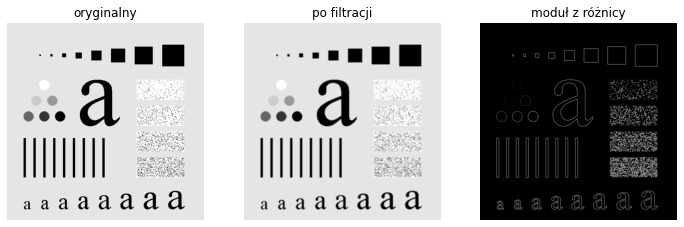

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate

img_jet = cv2.imread('jet.png')
img_jet = cv2.cvtColor(img_jet, cv2.COLOR_BGR2GRAY)
img_kw = cv2.imread('kw.png')
img_kw = cv2.cvtColor(img_kw, cv2.COLOR_BGR2GRAY)
img_moon = cv2.imread('moon.png')
img_moon = cv2.cvtColor(img_moon, cv2.COLOR_BGR2GRAY)
img_lenaSzum = cv2.imread('lenaSzum.png')
img_lenaSzum = cv2.cvtColor(img_lenaSzum, cv2.COLOR_BGR2GRAY)
img_lena = cv2.imread('lena.png')
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
img_plansza = cv2.imread('plansza.png')
img_plansza = cv2.cvtColor(img_plansza, cv2.COLOR_BGR2GRAY)

def wyswietlanie(I):
    plt.figure(dpi=200)
    plt.imshow(I, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

# wyswietlanie(img_jet)
# wyswietlanie(img_kw)
# wyswietlanie(img_moon)
# wyswietlanie(img_lenaSzum)
# wyswietlanie(img_lena)
# wyswietlanie(img_plansza)
def konwolucja(img, rozmiar):
    # kernel = np.ones((rozmiar,rozmiar))
    kernel = np.ones((rozmiar,rozmiar),np.float32)
    kernel = kernel/(rozmiar*rozmiar)
    dst = cv2.filter2D(img, -1, kernel)
    return dst

dst = konwolucja(img_plansza, 3)
img_diff = cv2.absdiff(img_plansza, dst)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_plansza, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

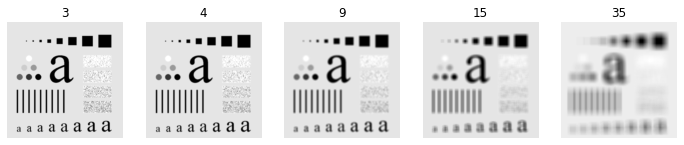

In [2]:
_, p = plt.subplots(1, 5, figsize=(12,6))
j=0
for i in [3,4,9,15,35]:
    p[j].imshow(konwolucja(img_plansza, i), cmap='gray')
    p[j].set_title(i)
    p[j].axis("off")
    j+=1
plt.show()


6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

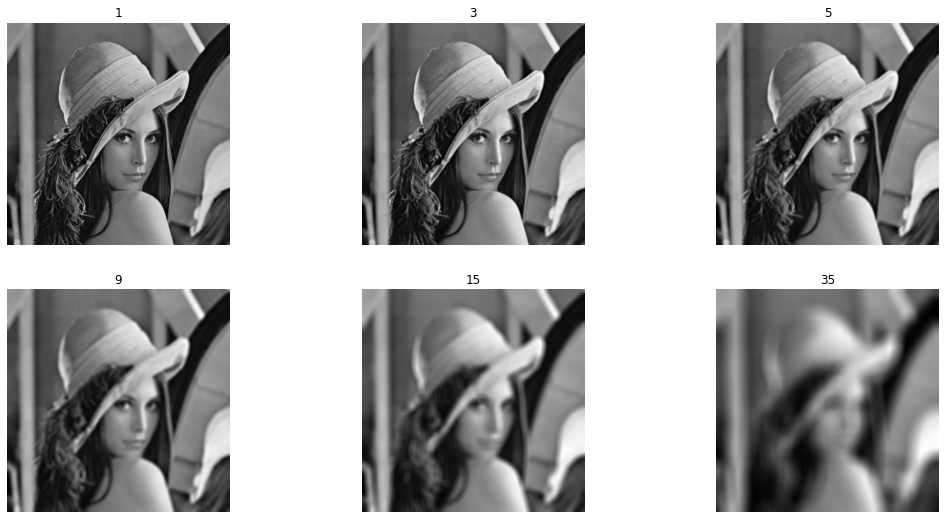

In [3]:
# wyswietlanie(img_lena)

_, p = plt.subplots(2, 3, figsize=(18,9))
j=0
k=0
for i in [1,3,5,9,15,35]:
    p[j][k].imshow(konwolucja(img_lena, i), cmap='gray')
    p[j][k].set_title(i)
    p[j][k].axis("off")
    if k==2:
        j+=1
        k=0
    else:
        k+=1
plt.show()


7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

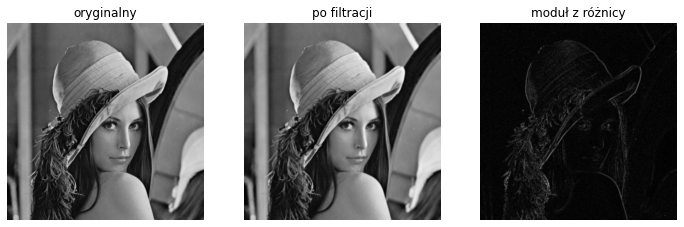

In [4]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M=M/sum(sum(M))

# plt.imshow(cv2.filter2D(img_lena,-1,M), cmap='gray')
# plt.axis("off")
# plt.show()

dst = cv2.filter2D(img_lena, -1, M)
img_diff=cv2.absdiff(dst, img_lena)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lena, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


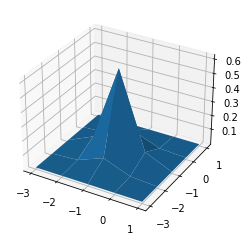

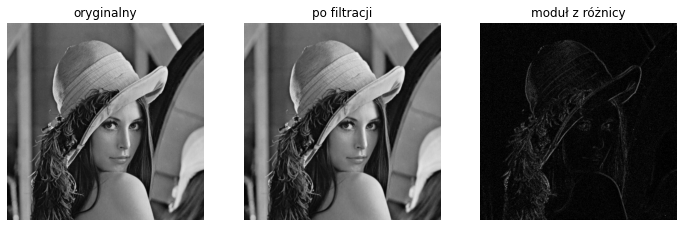

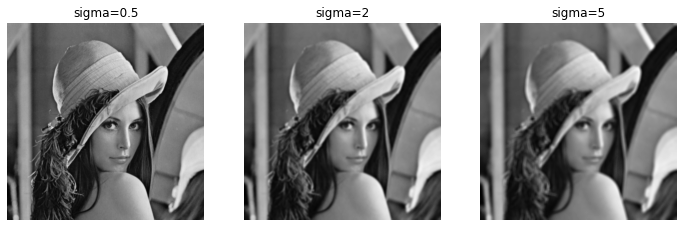

In [5]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    

mesh(fgaussian(5, 0.5), 5)

dst = cv2.GaussianBlur(img_lena, (3, 3), 0.5)
img_diff=cv2.absdiff(dst, img_lena)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lena, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
dst2 = cv2.GaussianBlur(img_lena, (9, 9), 0.5)
dst3 = cv2.GaussianBlur(img_lena, (9, 9), 2)
dst4 = cv2.GaussianBlur(img_lena, (9, 9), 5)
p1.imshow(dst2, cmap='gray')
p1.set_title("sigma=0.5")
p1.axis("off")

p2.imshow(dst3, cmap='gray')
p2.set_title("sigma=2")
p2.axis("off")

p3.imshow(dst4, cmap='gray')
p3.set_title("sigma=5")
p3.axis("off")

plt.show()



### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


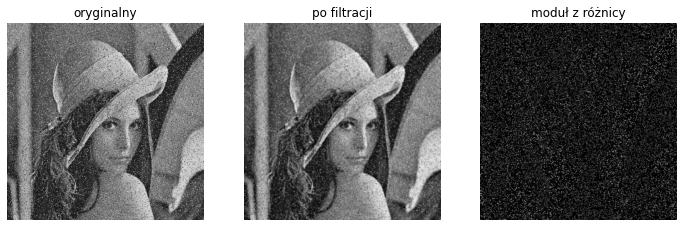

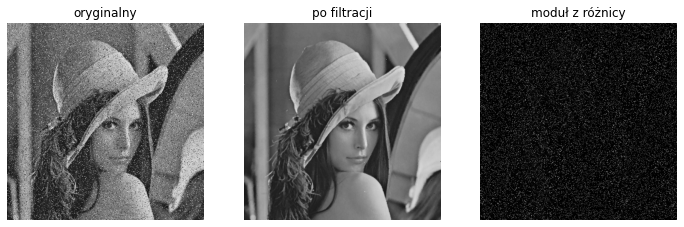

In [6]:
# wyswietlanie(img_lenaSzum)

dst = konwolucja(img_lenaSzum, 3)
img_diff=cv2.absdiff(dst, img_lenaSzum)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lenaSzum, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()


dst = cv2.medianBlur(img_lenaSzum, 3)
img_diff=cv2.absdiff(dst, img_lenaSzum)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lenaSzum, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

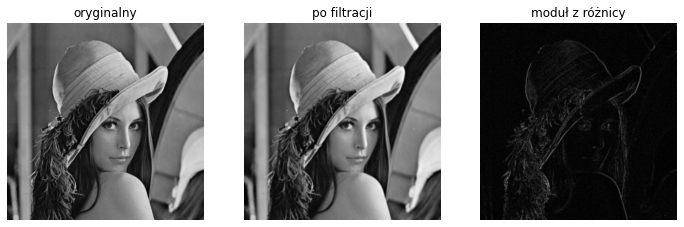

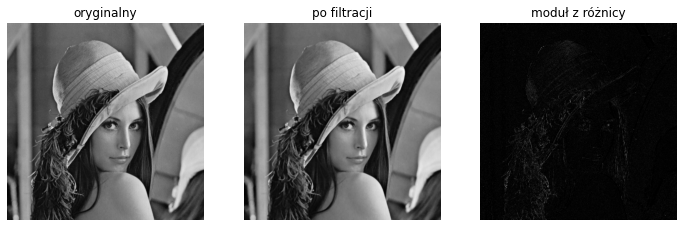

In [7]:
dst = konwolucja(img_lena, 3)
img_diff=cv2.absdiff(dst, img_lena)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lena, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()


dst = cv2.medianBlur(img_lena, 3)
img_diff=cv2.absdiff(dst, img_lena)

_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_lena, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(dst, cmap='gray')
p2.set_title("po filtracji")
p2.axis("off")

p3.imshow(img_diff, cmap='gray')
p3.set_title("moduł z różnicy")
p3.axis("off")

plt.show()


3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

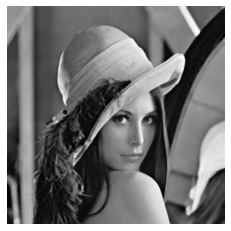

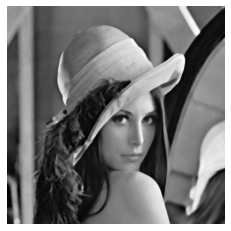

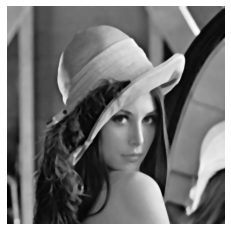

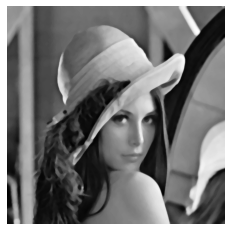

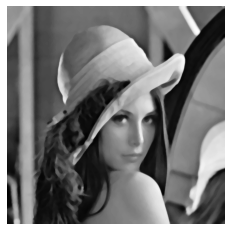

In [8]:
dst=img_lena
for i in range (5):
    dst = cv2.medianBlur(dst, 5)
    plt.imshow(dst, cmap='gray')
    plt.axis("off")
    plt.show()


## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

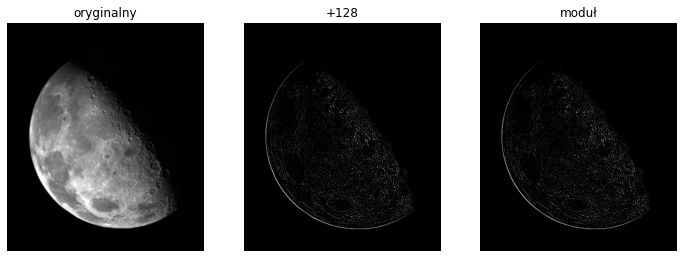

In [9]:
# wyswietlanie(img_moon)
M=np.array([[0,1,0],[1,-4,1],[0,1,0]])
M=M/9
dst=cv2.filter2D(img_moon, -1, M)
dst2=dst+128
dst3=np.abs(dst)
def wyswietlanie_subplot3(imgs, titles):
    _, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
    p1.imshow(imgs[0], cmap='gray')
    p1.set_title(titles[0])
    p1.axis("off")

    p2.imshow(imgs[1], cmap='gray')
    p2.set_title(titles[1])
    p2.axis("off")

    p3.imshow(imgs[2], cmap='gray')
    p3.set_title(titles[2])
    p3.axis("off")

    plt.show()

wyswietlanie_subplot3([img_moon, dst2, dst3],["oryginalny","+128","moduł"])


7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



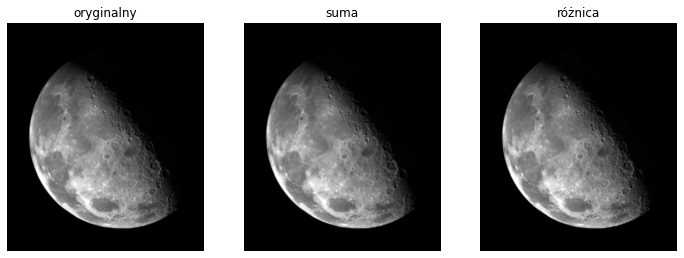

In [10]:
img_moon_sign = img_moon.astype("int16")
_, (p1,p2,p3) = plt.subplots(1, 3, figsize=(12,6))
p1.imshow(img_moon_sign, cmap='gray')
p1.set_title("oryginalny")
p1.axis("off")

p2.imshow(img_moon_sign+dst3, cmap='gray')
p2.set_title("suma")
p2.axis("off")

p3.imshow(np.abs(img_moon_sign - dst3), cmap='gray')
p3.set_title("różnica")
p3.axis("off")

plt.show()


### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

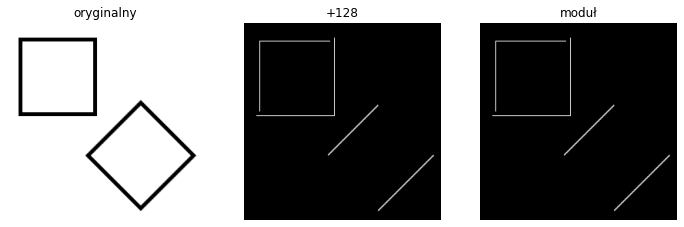

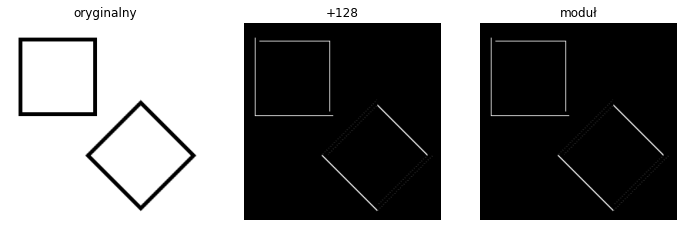

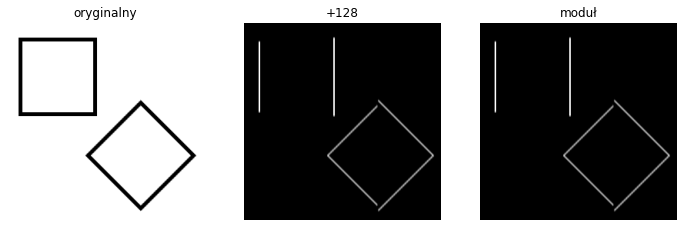

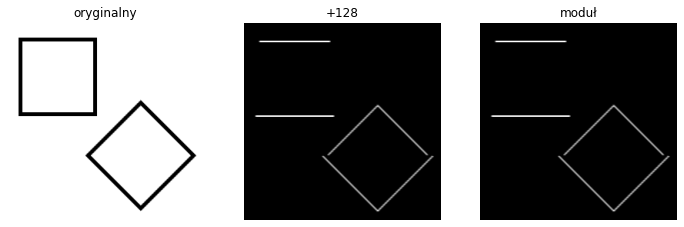

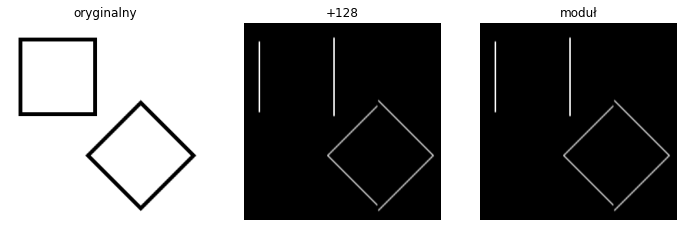

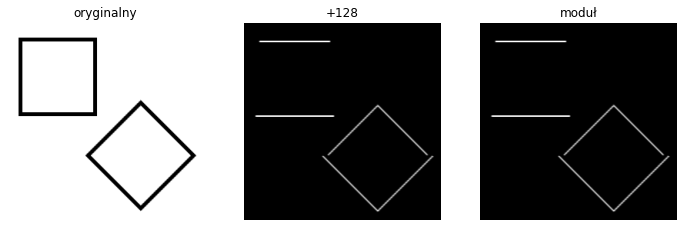

In [11]:
# wyswietlanie(img_kw)
R1=np.array([[0,0,0],[-1,0,0],[0,1,0]])/9
R2=np.array([[0,0,0],[0,0,-1],[0,1,0]])/9
P1=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])/9
P2=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])/9
S1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/9
S2=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])/9
def gradienty(gradient):
    dst=cv2.filter2D(img_kw, -1, gradient)
    dst2=dst+128
    dst3=np.abs(dst)
    wyswietlanie_subplot3([img_kw, dst2, dst3],["oryginalny","+128","moduł"])

gradienty(R1)
gradienty(R2)
gradienty(P1)
gradienty(P2)
gradienty(S1)
gradienty(S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



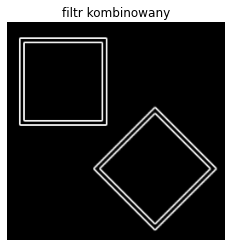

In [12]:
img_kw_sign = img_kw.astype("int16")
dst1 = cv2.filter2D(img_kw_sign,-1,S1)
dst2 = cv2.filter2D(img_kw_sign,-1,S2)
dst1 = dst1**2
dst2 = dst2**2
dst = dst1+dst2
dst=np.sqrt(dst)
plt.imshow(np.abs(dst), cmap='gray')
plt.title("filtr kombinowany")
plt.axis("off")
plt.show()


6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

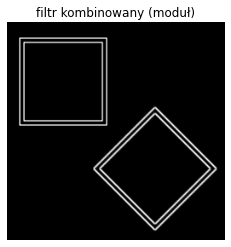

In [13]:
dst1 = np.abs(cv2.filter2D(img_kw_sign,-1,S1))
dst2 = np.abs(cv2.filter2D(img_kw_sign,-1,S2))
plt.imshow((dst1+dst2), cmap='gray')
plt.title("filtr kombinowany (moduł)")
plt.axis("off")
plt.show()


7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

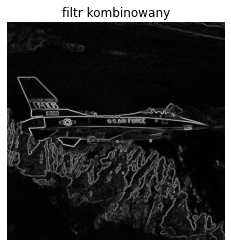

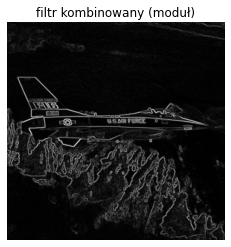

In [14]:
img_jet_sign = img_jet.astype("int16")
dst1 = (cv2.filter2D(img_jet_sign,-1,S1))**2
dst2 = (cv2.filter2D(img_jet_sign,-1,S2))**2
dst = dst1+dst2
dst=np.sqrt(dst)
plt.imshow(np.abs(dst), cmap='gray')
plt.title("filtr kombinowany")
plt.axis("off")
plt.show()

dst1 = np.abs(cv2.filter2D(img_jet_sign,-1,S1))
dst2 = np.abs(cv2.filter2D(img_jet_sign,-1,S2))
plt.imshow((dst1+dst2), cmap='gray')
plt.title("filtr kombinowany (moduł)")
plt.axis("off")
plt.show()
